# Clustering con Gaussian Mixture Models (GMM)
Este notebook aplica clustering usando Gaussian Mixture Models sobre el dataset FIFA 22.
Incluye selección de features, escalado, entrenamiento, visualización y evaluación básica.

In [1]:
%load_ext kedro.ipython 

[11/26/25 23:03:55] INFO     Using                                                                  ]8;id=139953;file:///usr/local/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=951550;file:///usr/local/lib/python3.11/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/usr/local/lib/python3.11/site-packages/kedro/framework/project/rich_                
                             logging.yml' as logging configuration.                                                

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=731496;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=590182;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=942270;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=378435;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as: /app.                                        ]8;id=20197;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=22769;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/26/25 23:04:02] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=811800;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=672505;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/26/25 23:04:16] DEBUG    Failed to send data to Heap. Exception of type 'ReadTimeout' was raised. ]8;id=976953;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=338449;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py#358\358]8;;\

                    INFO     Kedro project machine_learning_project                                 ]8;id=889406;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=418595;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=532974;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=689874;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/26/25 23:04:17] WARNING  Failed to load kedro_viz.launchers.jupyter commands from                  ]8;id=436274;file:///usr/local/lib/python3.11/site-packages/kedro/framework/cli/utils.py\utils.py]8;;\:]8;id=687962;file:///usr/local/lib/python3.11/site-packages/kedro/framework/cli/utils.py#346\346]8;;\
                             EntryPoint(name='line_magic',                                                         
                             value='kedro_viz.launchers.jupyter:run_viz', group='kedro.line_magic').               
                             Full exception: email-validator version >= 2.0 required, run pip install              
                             -U email-validator                                                                    

In [2]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'model_input_table',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regre

In [3]:
df_FIFA = catalog.load("model_input_table")
df_fifa_22 = catalog.load("preprocess_fifa_22")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=435343;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=293812;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

[11/26/25 23:04:18] INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=6559;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=970212;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [4]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#### **Selección de features**

In [12]:
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa_22[features]

#### **Escalado**

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Entrenamiento del modelo GMM**

In [7]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state=42
)

gmm_labels = gmm.fit_predict(X_scaled)
df_fifa_22["GMM_cluster"] = gmm_labels
df_fifa_22.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Overall_Class_Bin,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,GMM_cluster
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,...,1,0,0,0,179,69.0,107500000.0,250000.0,206900000.0,0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,...,1,0,0,0,189,82.0,93000000.0,140000.0,160400000.0,0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,...,1,0,0,0,182,83.0,44500000.0,135000.0,91200000.0,2
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,...,1,0,0,0,172,69.0,37000000.0,45000.0,77700000.0,2
5,212622,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,...,1,0,0,0,177,75.0,108000000.0,160000.0,186300000.0,0


##### **Matriz de probabilidades -  (ventaja única del GMM)**

In [8]:
probas = gmm.predict_proba(X_scaled)
probas_df = pd.DataFrame(probas, columns=[f"Cluster_{i}_prob" for i in range(4)])
probas_df.head()

,Cluster_0_prob,Cluster_1_prob,Cluster_2_prob,Cluster_3_prob
0,9.999865e-01,1.784684e-108,0.000000,1.350716e-05
1,9.999927e-01,6.398765e-106,0.000000,7.339525e-06
2,4.734427e-15,6.382880e-127,1.000000,5.099037e-11
3,1.211098e-03,9.162486e-87,0.998465,3.243111e-04
4,9.792065e-01,8.047641e-84,0.000000,2.079350e-02


#### **Silhouette score**

In [9]:
sil = silhouette_score(X_scaled, gmm_labels)
sil

np.float64(0.13083947916341027)

#### **Visualización en PCA 2D**

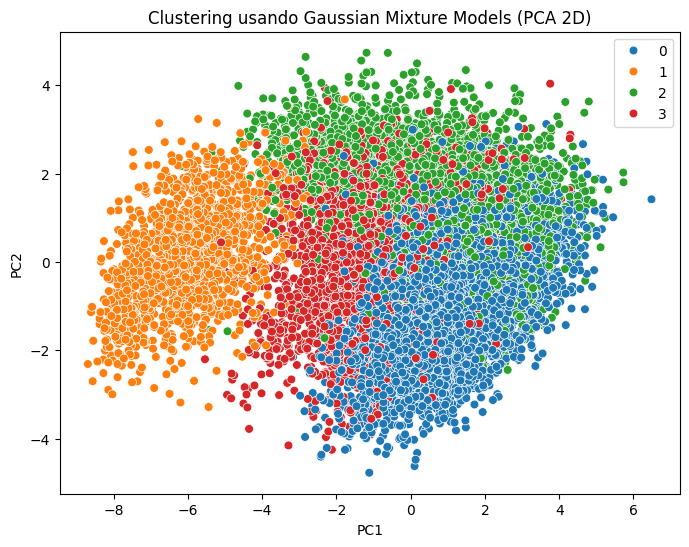

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=gmm_labels,
    palette="tab10",
    s=40
)
plt.title("Clustering usando Gaussian Mixture Models (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### **Conteo de grupos**

In [11]:
df_fifa_22["GMM_cluster"].value_counts()


GMM_cluster
0    6104
2    5676
3    3310
1    1495
Name: count, dtype: int64